In [1]:
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

54.06440248886304 -110.40661520435913
-73.24318333275647 -141.9699534090508
-68.87016002559987 -73.79151734838433
-44.943009609477556 102.60057908713816
-50.68348658368111 -117.32288400671908
-69.50418320929185 -77.88284472794051
60.205344469031246 129.50420544852625
-4.826314132995051 -82.75160911581318
82.13069385963576 165.22231512588434
60.08281635949791 158.0896956355657
40.384858856525284 70.87584222376546
76.68495324277052 -62.05196204833902
42.10190441640103 113.43531585750287
41.340407961131405 -15.710294626313555
-35.62920698283699 -87.94097445033563
-72.23507542179112 -158.59319816387705
-30.658035068326313 43.659035203062274
-0.27077605553552075 3.400980957558744
-21.624907842823717 -31.3301013320052
85.16849666149082 -72.39911794796959
22.856840592161916 109.65453716624677
-82.0397447690219 22.135161093997027
62.24412991331667 -158.88415078270052
-79.33125340765486 -25.66467368100112
71.4763422342109 55.31787885587025
-27.040644634323648 -5.387964137968311
31.7553636421757

-60.044458005880756 140.31501007664065
22.93856675542331 -40.55944691870636
-52.84335638078454 91.99931432067171
-45.15924779957642 -98.79215069433478
57.529122050180774 -17.328618759779346
18.650007926925994 115.1703568022159
22.170427314128077 -55.528422478068634
13.609956608444278 -174.42644934008513
46.689962788041925 58.67750092319454
36.23072256052973 -84.74422003111883
29.552183545558265 -104.98077215679727
-6.6718298801664275 -101.96580316103713
-25.601074688446914 111.35382720940015
48.220095413736914 75.98907285313874
-63.584758585819365 158.3348509448524
-13.452057219851554 67.57974849415277
67.82406882824083 -174.99537701673796
-87.14842628841033 139.72428680538644
14.205932965344772 -80.72681066673229
-22.19989913133091 -16.673870903114192
78.95013166324182 99.26070831896828
15.190459603957521 112.8455721774651
83.62637156514981 66.97782853858575
4.6044116763661265 -103.56357234674452
-17.623362537077867 -54.64517363055229
9.800816058819478 171.141561315604
-38.89892126853

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

592

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=49175ac230eeec94476c7eceaf5b7f9b


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 12 | bonnyville
Processing Record 2 of Set 12 | mataura
Processing Record 3 of Set 12 | ushuaia
Processing Record 4 of Set 12 | busselton
Processing Record 5 of Set 12 | rikitea
Processing Record 6 of Set 12 | pokrovsk
Processing Record 7 of Set 12 | talara
Processing Record 8 of Set 12 | pevek
Processing Record 9 of Set 12 | palana
Processing Record 10 of Set 12 | yaypan
Processing Record 11 of Set 12 | narsaq
Processing Record 12 of Set 12 | jining
Processing Record 13 of Set 12 | peniche
Processing Record 14 of Set 12 | lebu
Processing Record 15 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 16 of Set 12 | port-gentil
Processing Record 17 of Set 12 | caravelas
Processing Record 18 of Set 12 | qaanaaq
Processing Record 19 of Set 12 | guicheng
City not found. Skipping...
Processing Record 20 of Set 12 | bredasdorp
Processing Record 21 of Set 12 | bethel
Processing Record 22 of Se

Processing Record 32 of Set 15 | karamea
City not found. Skipping...
Processing Record 33 of Set 15 | el zulia
Processing Record 34 of Set 15 | nome
Processing Record 35 of Set 15 | mao
Processing Record 36 of Set 15 | tasiilaq
Processing Record 37 of Set 15 | cariamanga
Processing Record 38 of Set 15 | okato
Processing Record 39 of Set 15 | candido mendes
Processing Record 40 of Set 15 | vysokogornyy
Processing Record 41 of Set 15 | east london
Processing Record 42 of Set 15 | souris
Processing Record 43 of Set 15 | acajutla
Processing Record 44 of Set 15 | norman wells
Processing Record 45 of Set 15 | kavieng
Processing Record 46 of Set 15 | sabang
Processing Record 47 of Set 15 | camopi
Processing Record 48 of Set 15 | san patricio
Processing Record 49 of Set 15 | tuatapere
Processing Record 50 of Set 15 | chinsali
Processing Record 1 of Set 16 | beitbridge
Processing Record 2 of Set 16 | guangyuan
Processing Record 3 of Set 16 | cartagena del chaira
Processing Record 4 of Set 16 | 

Processing Record 17 of Set 19 | luzhou
Processing Record 18 of Set 19 | nanortalik
Processing Record 19 of Set 19 | balkhash
Processing Record 20 of Set 19 | pundaguitan
Processing Record 21 of Set 19 | svay rieng
Processing Record 22 of Set 19 | ossora
Processing Record 23 of Set 19 | samalaeulu
City not found. Skipping...
Processing Record 24 of Set 19 | galgani
City not found. Skipping...
Processing Record 25 of Set 19 | pinkafeld
Processing Record 26 of Set 19 | vangaindrano
Processing Record 27 of Set 19 | beroroha
Processing Record 28 of Set 19 | kloulklubed
Processing Record 29 of Set 19 | baykit
Processing Record 30 of Set 19 | antsohihy
Processing Record 31 of Set 19 | alyangula
Processing Record 32 of Set 19 | sioux lookout
Processing Record 33 of Set 19 | shimoda
Processing Record 34 of Set 19 | limbang
Processing Record 35 of Set 19 | gizo
Processing Record 36 of Set 19 | saint-alexandre
Processing Record 37 of Set 19 | ugoofaaru
Processing Record 38 of Set 19 | divo
Proce

Processing Record 50 of Set 22 | spornoye
Processing Record 1 of Set 23 | nazca
Processing Record 2 of Set 23 | moose factory
Processing Record 3 of Set 23 | kabare
Processing Record 4 of Set 23 | homer
Processing Record 5 of Set 23 | gorno-chuyskiy
City not found. Skipping...
Processing Record 6 of Set 23 | sabancuy
Processing Record 7 of Set 23 | afsin
Processing Record 8 of Set 23 | coffs harbour
Processing Record 9 of Set 23 | waipawa
Processing Record 10 of Set 23 | shirokiy
Processing Record 11 of Set 23 | hammerfest
Processing Record 12 of Set 23 | antalaha
Processing Record 13 of Set 23 | hurghada
Processing Record 14 of Set 23 | namatanai
Processing Record 15 of Set 23 | aksu
Processing Record 16 of Set 23 | voh
Processing Record 17 of Set 23 | salym
Processing Record 18 of Set 23 | tabiauea
City not found. Skipping...
Processing Record 19 of Set 23 | ulladulla
Processing Record 20 of Set 23 | kichera
Processing Record 21 of Set 23 | belle fourche
Processing Record 22 of Set 2

In [11]:
len(city_data)

543

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bonnyville,54.2668,-110.7350,54.72,43,16,8.21,CA,2022-09-13 03:45:15
1,Mataura,-46.1927,168.8643,45.48,98,98,10.58,NZ,2022-09-13 03:47:15
2,Ushuaia,-54.8000,-68.3000,37.06,70,0,3.44,AR,2022-09-13 03:47:15
3,Busselton,-33.6500,115.3333,59.52,76,96,24.00,AU,2022-09-13 03:46:54
4,Rikitea,-23.1203,-134.9692,73.20,70,54,3.89,PF,2022-09-13 03:47:15
5,Pokrovsk,48.2820,37.1758,56.21,87,51,7.47,UA,2022-09-13 03:47:16
6,Talara,-4.5772,-81.2719,63.19,83,56,19.42,PE,2022-09-13 03:47:16
7,Pevek,69.7008,170.3133,35.83,86,100,3.53,RU,2022-09-13 03:47:16
8,Palana,59.1167,159.9667,46.74,72,100,20.54,RU,2022-09-13 03:47:17
9,Yaypan,40.3758,70.8156,68.92,50,0,6.29,UZ,2022-09-13 03:47:17


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bonnyville,CA,2022-09-13 03:45:15,54.2668,-110.7350,54.72,43,16,8.21
1,Mataura,NZ,2022-09-13 03:47:15,-46.1927,168.8643,45.48,98,98,10.58
2,Ushuaia,AR,2022-09-13 03:47:15,-54.8000,-68.3000,37.06,70,0,3.44
3,Busselton,AU,2022-09-13 03:46:54,-33.6500,115.3333,59.52,76,96,24.00
4,Rikitea,PF,2022-09-13 03:47:15,-23.1203,-134.9692,73.20,70,54,3.89
...,...,...,...,...,...,...,...,...,...
538,Jacqueville,CI,2022-09-13 04:01:29,5.2052,-4.4146,73.80,88,98,9.44
539,Turukhansk,RU,2022-09-13 04:01:29,65.8167,87.9833,40.84,77,99,9.44
540,Sai Buri,TH,2022-09-13 04:01:30,6.7013,101.6168,86.95,59,84,4.72
541,Koronowo,PL,2022-09-13 04:01:30,53.3137,17.9370,46.49,99,56,5.57


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

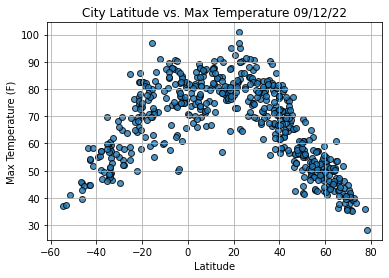

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

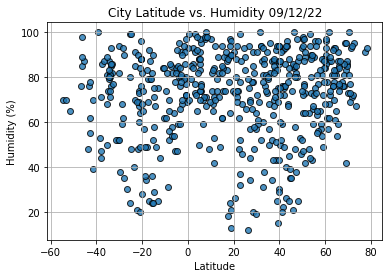

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

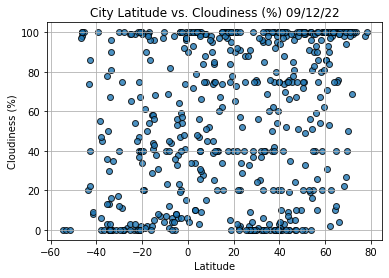

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

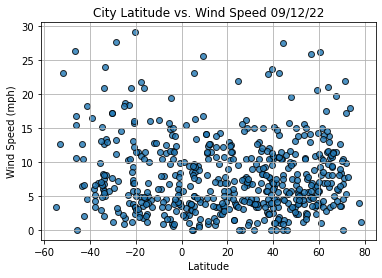

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                         Lebu
Country                        CL
Date          2022-09-13 03:47:18
Lat                      -37.6167
Lng                        -73.65
Max Temp                    46.87
Humidity                       86
Cloudiness                     45
Wind Speed                   4.23
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4      False
       ...  
538     True
539     True
540     True
541     True
542     True
Name: Lat, Length: 543, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bonnyville,CA,2022-09-13 03:45:15,54.2668,-110.7350,54.72,43,16,8.21
5,Pokrovsk,UA,2022-09-13 03:47:16,48.2820,37.1758,56.21,87,51,7.47
7,Pevek,RU,2022-09-13 03:47:16,69.7008,170.3133,35.83,86,100,3.53
8,Palana,RU,2022-09-13 03:47:17,59.1167,159.9667,46.74,72,100,20.54
9,Yaypan,UZ,2022-09-13 03:47:17,40.3758,70.8156,68.92,50,0,6.29
...,...,...,...,...,...,...,...,...,...
538,Jacqueville,CI,2022-09-13 04:01:29,5.2052,-4.4146,73.80,88,98,9.44
539,Turukhansk,RU,2022-09-13 04:01:29,65.8167,87.9833,40.84,77,99,9.44
540,Sai Buri,TH,2022-09-13 04:01:30,6.7013,101.6168,86.95,59,84,4.72
541,Koronowo,PL,2022-09-13 04:01:30,53.3137,17.9370,46.49,99,56,5.57


In [27]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bonnyville,CA,2022-09-13 03:45:15,54.2668,-110.7350,54.72,43,16,8.21
5,Pokrovsk,UA,2022-09-13 03:47:16,48.2820,37.1758,56.21,87,51,7.47
7,Pevek,RU,2022-09-13 03:47:16,69.7008,170.3133,35.83,86,100,3.53
8,Palana,RU,2022-09-13 03:47:17,59.1167,159.9667,46.74,72,100,20.54
9,Yaypan,UZ,2022-09-13 03:47:17,40.3758,70.8156,68.92,50,0,6.29


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

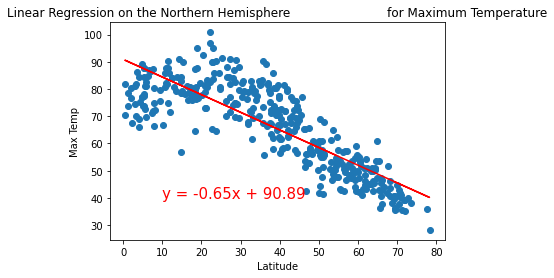

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

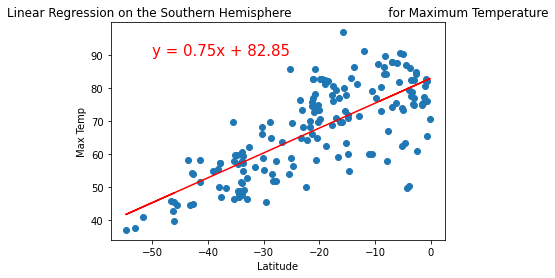

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

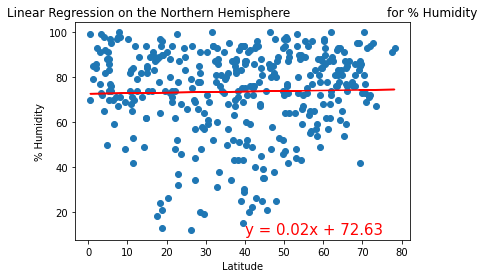

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

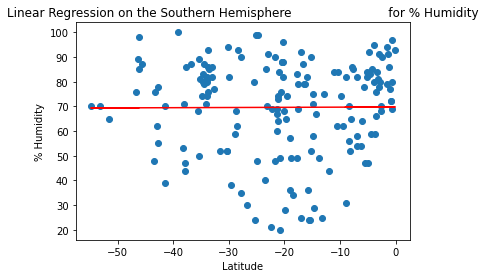

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

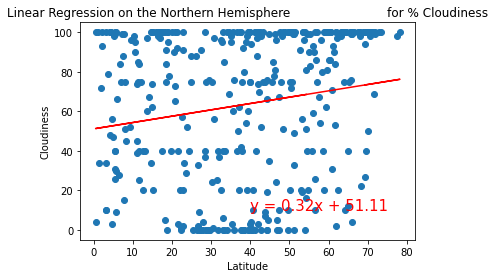

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', 'Cloudiness',(40,10))

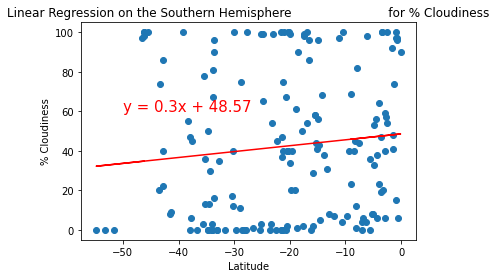

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

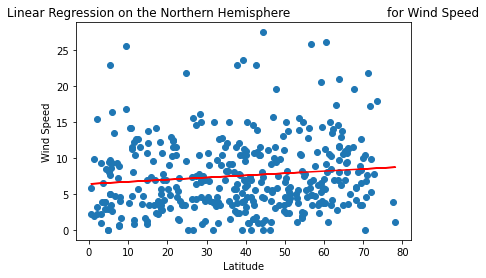

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))